这个笔记本会带领大家学习最基本的数据可视化技巧，我们会使用`matplotlib`和`seaborns`作为工具，其中`matplotlib`是基石，`seaborns`是基于`matplotlib`拓展的高级库，可以更为简便的实现绘图，让我们开始吧，在开始之前，你需要会使用`pandas`读取数据，我们将使用Data Science界的传统文化：**titanic**数据集

In [1]:
# 引入包
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# 读取数据
titanic = pd.read_csv("train.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Bar Plot
条形图📊，是一类常用于表达每一类别分别的量的图标，比如说：我们可以尝试可视化一下，*Fare*和*Survive*的关系：

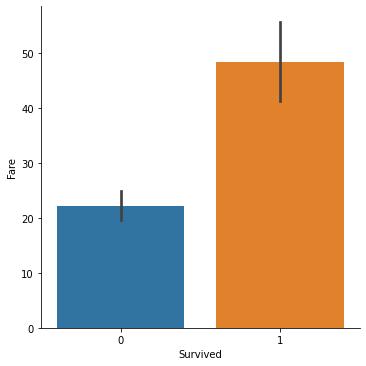

In [8]:
# For Seaborn
sns.catplot(x="Survived", y="Fare", data=titanic, kind="bar")

x, y指定的是在data中的列名，data指定的是数据的来源，kind指定的是图表的形式

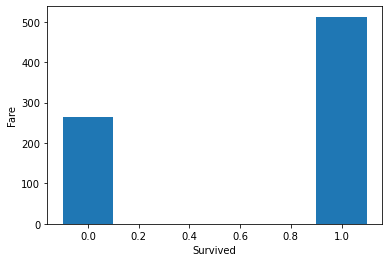

In [9]:
# For matplotlib
plt.figure()
plt.bar(titanic['Survived'], titanic['Fare'], width=0.2)
plt.xlabel('Survived')
plt.ylabel('Fare')
plt.show()

## Scatter Plot
Scatter Plot，散点图，简单的将每个点分布于整个空间，常用于快速发现数据中的隐藏规律，比如我们现在想寻找年龄Age与Fare之间的关系

<AxesSubplot:xlabel='Age', ylabel='Fare'>

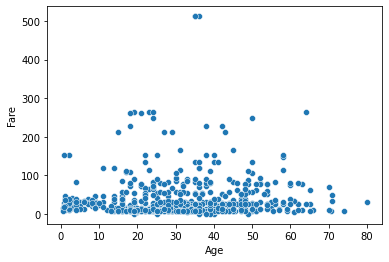

In [11]:
# For Seaborn
sns.scatterplot(x="Age", y="Fare", data=titanic)

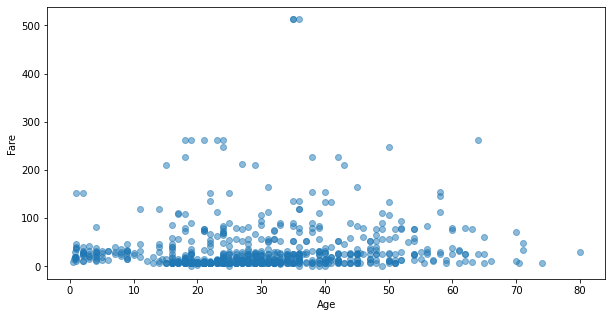

In [16]:
# For matplotlib
plt.figure(figsize=(10, 5))
plt.scatter(titanic['Age'], titanic['Fare'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

此时我们使用到了`figsize`参数，这个参数主要是通过给予(x, y)值以调控图片的大小，plt.scatter()中的`alpha`参数调控的是每一个点的透明度，0-1之间，越接近1越不透明

## Histogram
Histogram，直方图，常用于衡量数据自身的分布，比如我们想衡量年龄的分布：

/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

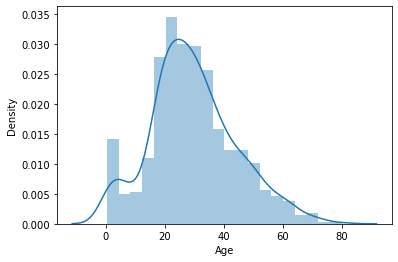

In [21]:
# For Seaborn
sns.distplot(titanic['Age'])

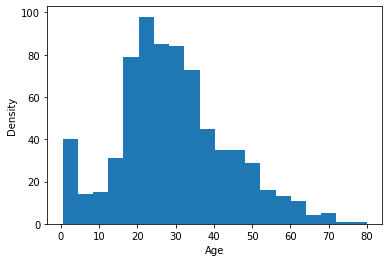

In [23]:
# For matplotlib
plt.figure()
plt.hist(titanic['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

这里我们使用了一个`bins`参数，这个参数用来调节分组的大小，比如这里我们将整个数据均分为20组。

## Box Plot

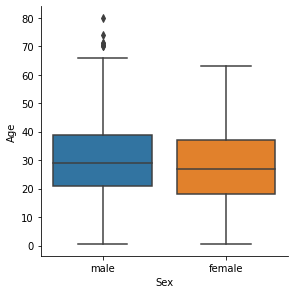

In [24]:
sns.catplot(x="Sex", y="Age", data=titanic, kind="box", height=4)

In [ ]:
plt.figure()
plt.boxplot((titanic.query("Sex=='male'")['Age'], titanic.query("Sex=='female'")['Age']), labels=['Male', 'Female'])
plt.xlabel("Sex")
plt.ylabel("Age")
plt.show()

从这个例子中我们可以发现，无论是哪种图片，`seaborn`的语法和形式都比`matplotlib`要简单很多，这也是为什么`seaborn`被称为高级库，但是`matplotlib`提供了更多可以个性化定制的参数，比如边界，比如颜色，比如大小，比如形状等等，当然这些对于初级教程有些太难了，请参考：https://matplotlib.org/ 

有没有发现`matplotlib`有一个几乎标准的语法形式：
* `plt.plot()`创建展示窗
* `plt.boxplot` or `plt.scatter` or `plt.plot`:创建一个图
* `plt.xlabel()`, `plt.ylabel()`, `plt.title()`：做一些修饰
* `plt.show()`：把图显示出来